In this notebook we will try to predict the credit default probability using tree models, in particular with the random forest model.

We will use the same splits and features that we computed for the KNN model.

In [6]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt
from pathlib import Path

In [7]:
data = pd.read_pickle(Path("..", "datasets", "computed", "credit_risk_splits.pickle"))

data.keys()

X_train = data['X_train']
y_train = data['y_train']

X_validation = data['X_validation']
y_validation = data['y_validation']

X_test = data['X_test']
y_test = data['y_test']

one_hot_encoder = data['one_hot_encoder']
standard_scaler = data['standard_scaler']

X_train_validation = pd.concat([X_train, X_validation])
y_train_validation = pd.concat([y_train, y_validation])

In [8]:
# hyperparameter tuning with crossvalidation of a random forest model
param_grid = {
    "n_estimators": [x for x in range(10, 200, 10)],
    "max_depth": [x for x in range(5, 21, 5)]
}

sklearn_grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, n_jobs=-1, scoring='f1')
_ = sklearn_grid_search_rf.fit(X_train_validation, y_train_validation)

/home/rpinosio/miniconda3/envs/ddb_tutorial/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [9]:
print("Best Estimator from Grid Search:", sklearn_grid_search_rf.best_estimator_)
print("Best Score from Grid Search:", sklearn_grid_search_rf.best_score_)

Best Estimator from Grid Search: RandomForestClassifier(max_depth=20, n_estimators=120)
Best Score from Grid Search: 0.480497644958913


We see that the f1 score of random forest is much higher than the other models on the validation dataset. This is promising: random forest might be the best model on the test data. Let's check.

In [10]:
# final f1 test score
# random forest provides the best model on this dataset
y_hat_test = sklearn_grid_search_rf.predict(X_test)

f1 = f1_score(y_test, y_hat_test)
print("F1 Score on Test Data:", f1)

F1 Score on Test Data: 0.4709864603481625


Indeed, with 0.47 f1 score random forest in indeed the best model of the bunch.

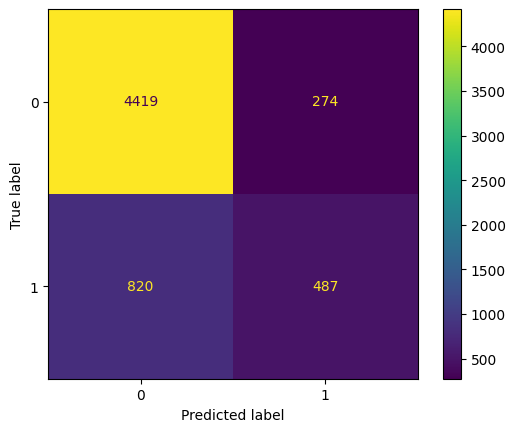

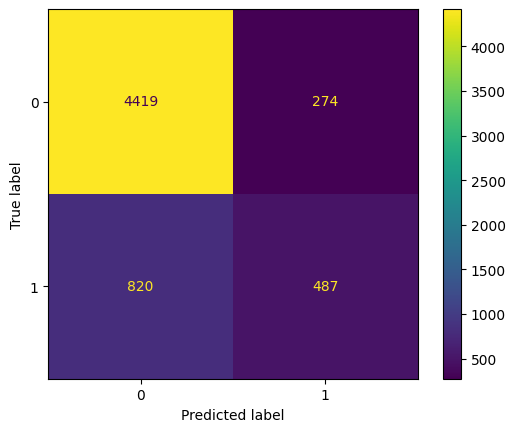

In [11]:

# Display the confusion matrix for the best estimator from the grid search on the test data
disp = ConfusionMatrixDisplay.from_estimator(sklearn_grid_search_rf.best_estimator_, X_test, y_test)
disp.plot()
plt.show()

In [12]:
# Calculate precision and recall scores
precision = precision_score(y_test, y_hat_test)
recall = recall_score(y_test, y_hat_test)

# Print precision and recall scores with descriptive messages
print("Precision Score on Test Data:", precision)
print("Recall Score on Test Data:", recall)

Precision Score on Test Data: 0.6399474375821288
Recall Score on Test Data: 0.3726090283091048


We can see that the higher f1 score is mostly driven by high precision, but recall is quite a bit lower. Note that for this application, i.e., fraud detection in credit card transactions, we might be more interested in precision rather than recall, as we want to avoid false positives (i.e., wrongly accusing someone of fraud). That being said, the recall is quite low, so we might want to improve it.

**Exercise:** look into the random forest model errors and investigate which observations the model is worse at predicting. How could we improve the model by, e.g., improving its recall?